In [1]:
# Import Packages I will need
from lex_processing import * 
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# To show plots in notebook
%matplotlib inline  

In [2]:
# Path is where the data I want to process is.
path = '/Users/Joe/dropbox/data/Edited Data/Presidents Data/ReaganSpeeches/'

In [3]:

df = pd.DataFrame()

In [4]:
for filename in os.listdir(path):
    if filename.endswith('txt'):
        f = open(path + filename)
        raw = f.read()
        words = word_tokenize(raw)
        sents = sent_tokenize(raw)
        processed = preprocess(raw)
        lex = lexical_diversity(words)
        mls = meanLengthSentence(processed)
        wordDict = wordCount(processed)
        thetuple = {'Filename': filename, 'LexicalDiversity': lex, 'WordCount':len(words), 
                    'UniqueWords':len(set(words)), 'MLU': mls}
        finalDict = {**thetuple, **wordDict}
        #df.loc[len(df)] = thetuple
        #temp_df = tempdf.append(thetuple, ignore_index = True)
        df = df.append(finalDict, ignore_index = True)

In [5]:
# Rearranging Columns
inserted_cols = ['Filename', 'LexicalDiversity', 'WordCount', 'UniqueWords', 'MLU']
cols = ([col for col in inserted_cols if col in df] 
        + [col for col in df if col not in inserted_cols])
df = df[cols]
#cols = ['Filename']  + [col for col in df if col != 'Filename']
#df = df[cols]

In [6]:
df = df.fillna(0)

In [7]:
list(df)

['Filename',
 'LexicalDiversity',
 'WordCount',
 'UniqueWords',
 'MLU',
 "''",
 ',',
 '.',
 ':',
 'CC',
 'CD',
 'DT',
 'EX',
 'IN',
 'JJ',
 'JJR',
 'JJS',
 'MD',
 'NN',
 'NNP',
 'NNPS',
 'NNS',
 'PDT',
 'POS',
 'PRP',
 'PRP$',
 'RB',
 'RBR',
 'RBS',
 'RP',
 'TO',
 'UH',
 'VB',
 'VBD',
 'VBG',
 'VBN',
 'VBP',
 'VBZ',
 'WDT',
 'WP',
 'WRB',
 '``',
 '$',
 'FW',
 'WP$']

In [8]:
# Remove punctuation
df['WordCountClean'] = df['WordCount'] - df["''"] - df[","] - df["."] - df[":"] - df['``'] - df['$']

In [9]:
df

,Filename,LexicalDiversity,WordCount,UniqueWords,MLU,'',",",.,:,CC,...,VBP,VBZ,WDT,WP,WRB,``,$,FW,WP$,WordCountClean
0,Reagan - Speech19 - Edited.txt,0.240330,3878.0,932.0,23.938272,2.0,200.0,162.0,4.0,149.0,...,194.0,107.0,38.0,38.0,23.0,2.0,0.0,0.0,0.0,3508.0
1,Reagan - Speech3 - Edited.txt,0.252142,3851.0,971.0,23.625767,2.0,189.0,164.0,0.0,134.0,...,184.0,113.0,42.0,27.0,19.0,2.0,1.0,0.0,0.0,3493.0
2,Reagan - Speech4 - Edited.txt,0.263561,3392.0,894.0,27.136000,8.0,187.0,125.0,5.0,136.0,...,149.0,78.0,25.0,22.0,19.0,6.0,5.0,0.0,0.0,3056.0
3,Reagan - Speech28 - Edited.txt,0.246034,3467.0,853.0,25.492647,2.0,178.0,136.0,2.0,150.0,...,168.0,67.0,33.0,31.0,12.0,2.0,3.0,1.0,0.0,3144.0
4,Reagan - Speech18 - Edited.txt,0.232119,3761.0,873.0,20.551913,5.0,186.0,183.0,7.0,139.0,...,174.0,94.0,41.0,40.0,19.0,5.0,4.0,0.0,0.0,3371.0
5,Reagan - Speech5 - Edited.txt,0.242697,4005.0,972.0,24.570552,4.0,218.0,163.0,6.0,144.0,...,191.0,125.0,43.0,19.0,22.0,4.0,3.0,0.0,0.0,3607.0
6,Reagan - Speech2 - Edited.txt,0.238806,3886.0,928.0,24.287500,5.0,197.0,160.0,4.0,132.0,...,192.0,96.0,38.0,31.0,19.0,5.0,2.0,0.0,0.0,3513.0
7,Reagan - Speech29 - Edited.txt,0.244432,3637.0,889.0,21.520710,0.0,188.0,169.0,7.0,148.0,...,197.0,95.0,32.0,44.0,17.0,0.0,3.0,0.0,0.0,3270.0
8,Reagan - Speech24 - Edited.txt,0.247517,3826.0,947.0,23.763975,1.0,191.0,161.0,8.0,141.0,...,199.0,83.0,39.0,15.0,15.0,1.0,1.0,0.0,0.0,3463.0
9,Reagan - Speech23 - Edited.txt,0.237313,4020.0,954.0,24.662577,5.0,219.0,163.0,6.0,152.0,...,161.0,94.0,27.0,28.0,22.0,5.0,9.0,0.0,1.0,3613.0


In [10]:
df.to_csv('test.csv')

In [11]:
testpath = '/Users/Joe/dropbox/'

In [12]:
a = pd.read_csv(testpath + "dates.csv")
b = pd.read_csv(testpath + "test.csv")

In [13]:
a['JDate'] = [datetime.datetime.strptime(x, '%d/%m/%Y') for x in a['Date']] 

In [14]:
a['Julian'] = [get_julian_datetime(x) for x in a['JDate']]

In [15]:
merged = a.merge(b, on='Filename')

merged = merged.drop(['Unnamed: 0'], axis=1)
merged = merged.drop(['Date'], axis=1)

In [16]:
merged = merged.sort_values(by=['JDate'])

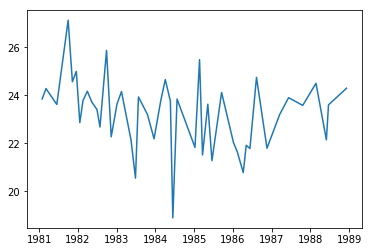

In [17]:
plt.plot(merged['JDate'], merged['MLU'])

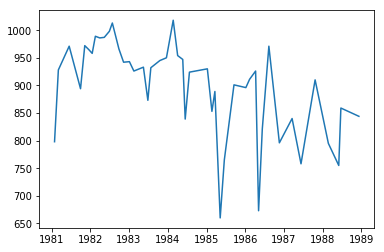

In [18]:
plt.plot(merged['JDate'], merged['UniqueWords'])

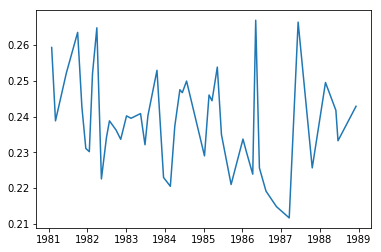

In [19]:
plt.plot(merged['JDate'], merged['LexicalDiversity'])

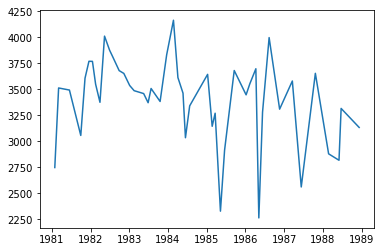

In [20]:
plt.plot(merged['JDate'], merged['WordCountClean'])